In [1]:
import numpy as np
import pandas as pd

#interecting with operating system
import os

#Accuracy measurement
from sklearn.metrics import confusion_matrix

#to shuffle 
from sklearn.utils import shuffle

#data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Model Module
import tensorflow as tf
#transforamtion of image for Augmentation, Segmentation and Overfitting
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#Neural Network Layers (Dropout: to avoid overfitting)
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, Activation

from tensorflow.keras import backend as bk

from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adamax, Adagrad

from tensorflow.keras.models import Sequential 


from tqdm import tqdm
import cv2  #openCV

In [2]:
classNames =['cats', 'dogs']
#enumerate counting the iteration and indexing the value in the list starts with 0
classNamesLabels= {classnames: i for i, classnames in enumerate(classNames)}

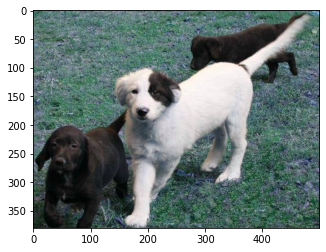

In [3]:
imageLocation ="../input/cat-and-dogs/dataset/training_set/dogs/dog.16.jpg"
imageData=cv2.imread(imageLocation)
plt.imshow(imageData)
plt.show()

In [4]:
#to reshape the image 
image_shape = (126,126)

In [5]:
def datasetLoaderFromDirectory():
    #Load Dataset from Folder
    dataset_path = ["../input/cat-and-dogs/dataset/training_set/", "../input/cat-and-dogs/dataset/test_set/"]
    #store data into a list for respective path
    imageDataOutput=[]
    #tag each data path file
    for i in dataset_path:
        #List for Image Data
        images=[]
        labels=[]
        print("Counting : {}".format(i))
        #for directory path
        for j in os.listdir(i):
            
            label = classNamesLabels[j]
            
            for imageDataFile in tqdm(os.listdir(os.path.join(i, j))):
                    imagePath=os.path.join(os.path.join(i,j), imageDataFile)
                
                    #image read and preprocessing
                    #BGR-for opencv-imread and RGB-for matplotlib image
                    image = cv2.imread(imagePath)
                    image= cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                    image= cv2.resize(image, image_shape)
                
                    images.append(image)
                    labels.append(label)
        #to produce the image as numpy array
        images= np.array(images, dtype = "float64") #depends of OS (32/64)
        labels= np.array(labels, dtype = "float64")
            
            
        imageDataOutput.append((images, labels))
            
    return imageDataOutput

In [6]:
(train_images, train_labels), (test_images, test_labels) = datasetLoaderFromDirectory()

Counting : ../input/cat-and-dogs/dataset/training_set/


100%|██████████| 4000/4000 [00:14<00:00, 281.06it/s]


Counting : ../input/cat-and-dogs/dataset/test_set/


100%|██████████| 1000/1000 [00:04<00:00, 246.79it/s]


In [7]:
#now we will shuffle on train dataset only and magic key word (random_state)
train_images, train_labels = shuffle(train_images, train_labels, random_state = 42)

In [8]:
print("train_labels:", train_labels)
print("train shape:",train_images.shape)

print("test_labels:", test_labels)
print("test shape:",test_images.shape)

train_labels: [1. 1. 1. ... 1. 0. 0.]
train shape: (8000, 126, 126, 3)
test_labels: [1. 1. 1. ... 0. 0. 0.]
test shape: (2000, 126, 126, 3)


In [9]:
#unpack train dataset: total no of label == total no of quantity
#_,: value referencing. There are two variables. But we need to unpack only one variable
_, trainImageInfo = np.unique(train_labels, return_counts = True)
_, testImageInfo = np.unique(test_labels, return_counts = True)

In [10]:
print("Train Image Lab1l Information for 0 Class:", trainImageInfo[0])
print("Train Image Label Information for 1 Class:", trainImageInfo[1])
print("Test Image Lab1l Information for 0 Class1", testImageInfo[0])
print("Test Image Label Information for 1 Class:", testImageInfo[1])

Train Image Lab1l Information for 0 Class: 4000
Train Image Label Information for 1 Class: 4000
Test Image Lab1l Information for 0 Class1 1000
Test Image Label Information for 1 Class: 1000


**Visualization**

In [11]:


#Creating DataFrame for storing IMAGE labels metadata
#uing Dictonary Concept, we need to use {} and it should be classNames for Index

pd.DataFrame({"Train": trainImageInfo,
              "Test": testImageInfo},
               index = classNames)

,Train,Test
cats,4000,1000
dogs,4000,1000


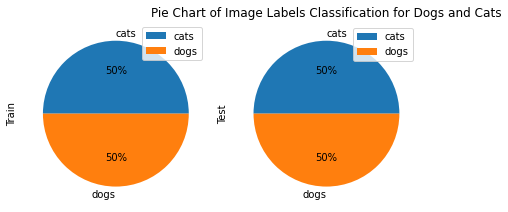

In [12]:
#Create a pie chart using bar plot concept
pd.DataFrame({"Train": trainImageInfo,
              "Test": testImageInfo},
               index = classNames).plot.pie(subplots=True,  autopct='%1.0f%%')
plt.title("Pie Chart of Image Labels Classification for Dogs and Cats")
plt.tight_layout()
plt.show()

**To see the feature details**

In [13]:
#read one image features
imageFeature=train_images[0] #feature ranges in between 0-255
#no of unique features
print("no of unique features:",len(np.unique(imageFeature)))

print("Array Details of imageFeature:", "\n", imageFeature)

no of unique features: 256
Array Details of imageFeature: 
 [[[ 16.  21.   9.]
  [ 35.  35.  25.]
  [ 50.  42.  34.]
  ...
  [236. 199. 164.]
  [235. 196. 156.]
  [213. 191. 164.]]

 [[ 19.  22.  11.]
  [ 30.  29.  19.]
  [ 32.  26.  18.]
  ...
  [213. 178. 142.]
  [207. 171. 130.]
  [208. 180. 149.]]

 [[ 20.  23.  12.]
  [ 24.  25.  14.]
  [ 19.  15.   6.]
  ...
  [237. 203. 166.]
  [237. 202. 161.]
  [225. 192. 157.]]

 ...

 [[151. 120.  86.]
  [130.  97.  63.]
  [ 86.  76.  48.]
  ...
  [117.  99.  79.]
  [107.  94.  76.]
  [100.  80.  65.]]

 [[154. 126.  95.]
  [134. 103.  69.]
  [105.  76.  48.]
  ...
  [116. 101.  77.]
  [110.  95.  74.]
  [104.  89.  67.]]

 [[158. 130.  99.]
  [144. 113.  79.]
  [109.  79.  51.]
  ...
  [110.  96.  71.]
  [108.  93.  72.]
  [ 99.  84.  61.]]]


In [14]:
#Scaling the images 
train_images = train_images/255.0
test_images = test_images/255.0

In [15]:
#train_images[0]
print("Values are in between 0 and 1")
np.unique(train_images[0])

Values are in between 0 and 1


array([0.        , 0.00392157, 0.00784314, 0.01176471, 0.01568627,
       0.01960784, 0.02352941, 0.02745098, 0.03137255, 0.03529412,
       0.03921569, 0.04313725, 0.04705882, 0.05098039, 0.05490196,
       0.05882353, 0.0627451 , 0.06666667, 0.07058824, 0.0745098 ,
       0.07843137, 0.08235294, 0.08627451, 0.09019608, 0.09411765,
       0.09803922, 0.10196078, 0.10588235, 0.10980392, 0.11372549,
       0.11764706, 0.12156863, 0.1254902 , 0.12941176, 0.13333333,
       0.1372549 , 0.14117647, 0.14509804, 0.14901961, 0.15294118,
       0.15686275, 0.16078431, 0.16470588, 0.16862745, 0.17254902,
       0.17647059, 0.18039216, 0.18431373, 0.18823529, 0.19215686,
       0.19607843, 0.2       , 0.20392157, 0.20784314, 0.21176471,
       0.21568627, 0.21960784, 0.22352941, 0.22745098, 0.23137255,
       0.23529412, 0.23921569, 0.24313725, 0.24705882, 0.25098039,
       0.25490196, 0.25882353, 0.2627451 , 0.26666667, 0.27058824,
       0.2745098 , 0.27843137, 0.28235294, 0.28627451, 0.29019

In [16]:
print("no of unique features:",len(np.unique(train_images[0])))

no of unique features: 256


**Random Index Generation of train_images**

In [17]:
print(np.random.randint(train_images.shape[0]))
print(np.random.randint(train_images.shape[0]))
print(np.random.randint(train_images.shape[0]))
print(np.random.randint(train_images.shape[0]))

2247
6044
2985
2601


In [18]:
train_labels[1001]

0.0

In [19]:
train_labels

array([1., 1., 1., ..., 1., 0., 0.])

**Prepare custom VGG Model with changing the value of following parameters**

1. Filters Starts from 32

2. padding = "valid"

3. input_shape = (128, 128, 3)

4. MaxPooling2D = (3, 3), (2, 2), (2, 2), (2, 2), (2, 2), (1, 1)

5. Strides = (1, 1), (2, 2), (2, 2), (1, 1) (1, 1) (1, 1)

6. in 5th & 6th Layer total Conv2D = 4

7. Kernel size = (11, 11), (4, 4), (3, 3), (3, 3),(2, 2), (2, 2)

In [20]:
model = Sequential()


#Input Layer
model.add(Conv2D(filters = 32, kernel_size = (11, 11), padding = "valid", activation = "relu", input_shape = (126,126, 3)))
model.add(Conv2D(filters = 32, kernel_size = (11, 11),padding = "valid", activation = "relu"))
model.add(MaxPooling2D(pool_size = (3, 3), strides = (1, 1)))

# #(224/2, 224/2) -- > (112, 112)
 #100

# #2nd Layer
model.add(Conv2D(filters = 32, kernel_size = (4, 4), padding = "valid", activation = "relu"))
model.add(Conv2D(filters = 32,kernel_size = (4, 4),padding = "valid", activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))

# 100 + 40
#3rd Layer
model.add(Conv2D(filters = 64, kernel_size = (3, 3),padding = "valid", activation = "relu"))
model.add(Conv2D(filters = 64, kernel_size = (3, 3),padding = "valid", activation = "relu"))
model.add(Conv2D(filters = 64, kernel_size = (3, 3),padding = "valid", activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))

# #4th Layer
model.add(Conv2D(filters = 64, kernel_size = (3, 3),padding = "valid", activation = "relu"))
model.add(Conv2D(filters = 64, kernel_size = (3, 3),padding = "valid", activation = "relu"))
model.add(Conv2D(filters = 64, kernel_size = (3, 3),padding = "valid", activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (1, 1)))

#
model.add(Conv2D(filters = 128, kernel_size = (2, 2),padding = "valid", activation = "relu"))
model.add(Conv2D(filters = 128, kernel_size = (2, 2),padding = "valid", activation = "relu"))
model.add(Conv2D(filters = 128, kernel_size = (2, 2),padding = "valid", activation = "relu"))
model.add(Conv2D(filters = 128, kernel_size = (2, 2),padding = "valid", activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (1, 1)))

model.add(Conv2D(filters = 128, kernel_size = (2, 2),padding = "valid", activation = "relu"))
model.add(Conv2D(filters = 128, kernel_size = (2, 2),padding = "valid", activation = "relu"))
model.add(Conv2D(filters = 128, kernel_size = (2, 2),padding = "valid", activation = "relu"))
model.add(Conv2D(filters = 128, kernel_size = (2, 2),padding = "valid", activation = "relu"))
model.add(MaxPooling2D(pool_size = (1, 1), strides = (1, 1)))

model.add(Flatten())


#Output Layer
model.add(Dense(64, activation = "relu")) 
model.add(Dense(32, activation = "relu"))
model.add(Dense(2, activation = "softmax"))



2022-08-18 22:36:32.864582: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-18 22:36:32.874086: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-18 22:36:32.874823: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-18 22:36:32.876537: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 116, 116, 32)      11648     
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 106, 106, 32)      123936    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 104, 104, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 101, 101, 32)      16416     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 98, 98, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 47, 47, 64)        1

In [22]:
model.compile(optimizer = 'adam',
             loss = "sparse_categorical_crossentropy",
             metrics = ['accuracy'])

In [23]:
modelData = model.fit(train_images,
                     train_labels,
                      epochs = 5,
                     batch_size = 120,
                     validation_split=0.2)

2022-08-18 22:36:34.392859: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1219276800 exceeds 10% of free system memory.
2022-08-18 22:36:35.885356: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1219276800 exceeds 10% of free system memory.
2022-08-18 22:36:36.869063: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5


2022-08-18 22:36:38.200717: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


54/54 [==============================] - 16s 176ms/step - loss: 0.6933 - accuracy: 0.4988 - val_loss: 0.6933 - val_accuracy: 0.4919
Epoch 2/5
54/54 [==============================] - 7s 136ms/step - loss: 0.6932 - accuracy: 0.5020 - val_loss: 0.6932 - val_accuracy: 0.4919
Epoch 3/5
54/54 [==============================] - 7s 137ms/step - loss: 0.6932 - accuracy: 0.4902 - val_loss: 0.6932 - val_accuracy: 0.4919
Epoch 4/5
54/54 [==============================] - 7s 136ms/step - loss: 0.6932 - accuracy: 0.4895 - val_loss: 0.6932 - val_accuracy: 0.4919
Epoch 5/5
54/54 [==============================] - 7s 136ms/step - loss: 0.6932 - accuracy: 0.4939 - val_loss: 0.6932 - val_accuracy: 0.4919


In [24]:
def accuracy_and_loss_Plot(model):
    
    fig = plt.figure(figsize = (10, 10))
    
    plt.subplot(221)
    plt.plot(modelData.history["accuracy"], 'bo--', label = 'accuracy')
    plt.plot(modelData.history["val_accuracy"], 'ro--', label = 'val_accuracy')
    plt.title("Training Data Accuracy Measurement")
    plt.xlabel("Number of Epochs")
    plt.ylabel("Accuracy Information")
    plt.grid()
    plt.legend()
    plt.tight_layout()
    
    
    
    plt.subplot(222)
    plt.plot(modelData.history["loss"], 'bo--', label = 'loss')
    plt.plot(modelData.history["val_loss"], 'ro--', label = 'val_loss')
    plt.title("Training Data Loss Measurement")
    plt.xlabel("Number of Epochs")
    plt.ylabel("Loss Information")
    plt.grid()
    plt.legend()
    plt.tight_layout()
    
    plt.show()

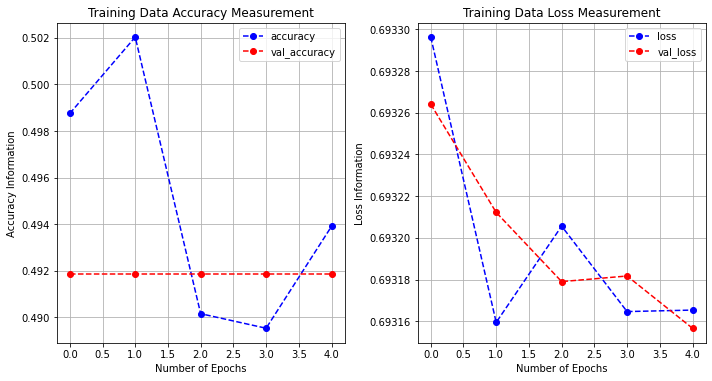

In [25]:
accuracy_and_loss_Plot(model)

In [26]:
predictedData = model.predict(test_images)
predictedDataLabels = np.argmax(predictedData, axis = 1)
#ImageVisualization(classNames, test_images, predictedDataLabels)

In [27]:
testLoss = model.evaluate(test_images, test_labels)

63/63 [==============================] - 1s 15ms/step - loss: 0.6931 - accuracy: 0.5000


In [28]:
def ImageVisualization01(classNames, imagePath, imagelabel, actual_label):
    #create index for indivisual Image and index will be genarated in random order
    #we will identify image using feature metrics
    index= np.random.randint(imagePath.shape[0]) #index is always integers and choose index randomly
    #print(index) #---- to check index float/int(it's int)
    plt.figure() #define frame size
    plt.imshow(imagePath[index])
    
    plt.xticks([]) #X-label positioning
    plt.yticks([])  #Y-label poitioning
    plt.grid(False)
    plt.tight_layout()
    #{} use to pass the index values and + use to concat the label of actual image
    plt.title("Index of this Image is: {}".format(index) + " And Predicted Class is: " 
              + classNames[int(imagelabel[index])]
              + ". Actual  is: " + classNames[int(actual_label[index])]) #train_images is float
    plt.show()


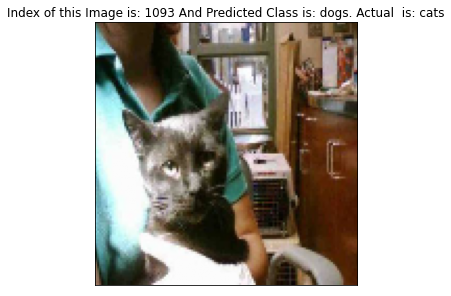

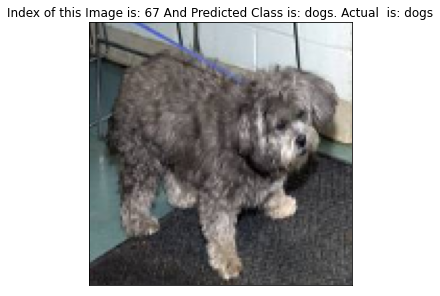

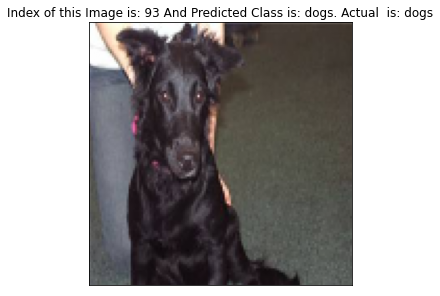

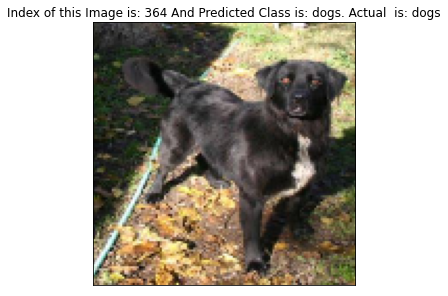

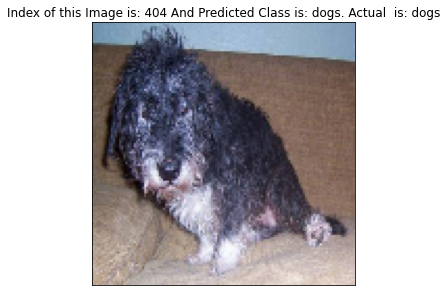

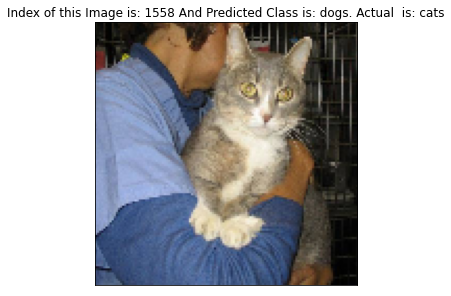

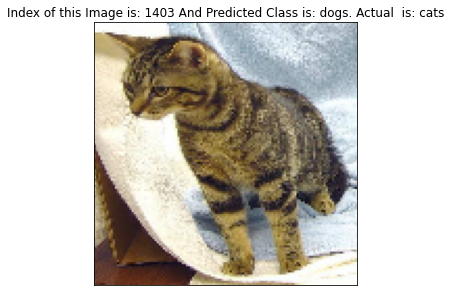

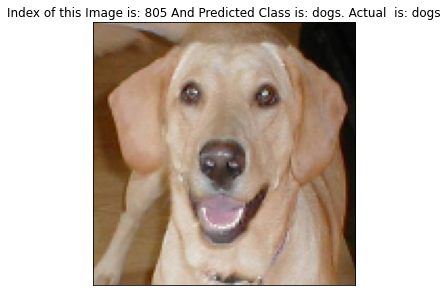

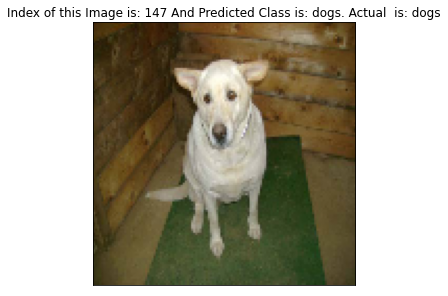

In [29]:
#Predicted vs Test Class
for i in range(1,10):
    ImageVisualization01(classNames, test_images, predictedDataLabels, test_labels)

In [30]:
def ImageVisualization2(classNames, imagePath, imagelabel):
    
    fig = plt.figure(figsize=(10, 10))
    fig.suptitle("Random Image Visualization", fontsize = 20 )
    
    for i in range(25):
        plt.subplot(5, 5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.tight_layout()
        
        plt.imshow(imagePath[i], cmap = plt.cm.binary)
        plt.xlabel("Class Names: {}".format(classNames[int(imagelabel[i])]))
    plt.show()

In [31]:
def missClassification(class_names, test_images, test_labels, pred_labels):
    result = (test_labels == pred_labels)
    missClass = np.where(result == 0)
    missClassImage = test_images[missClass]
    missClasslabels = pred_labels[missClass]

    title = "Some examples of mislabeled images by the classifier:"
    ImageVisualization2(class_names,  missClassImage, missClasslabels)

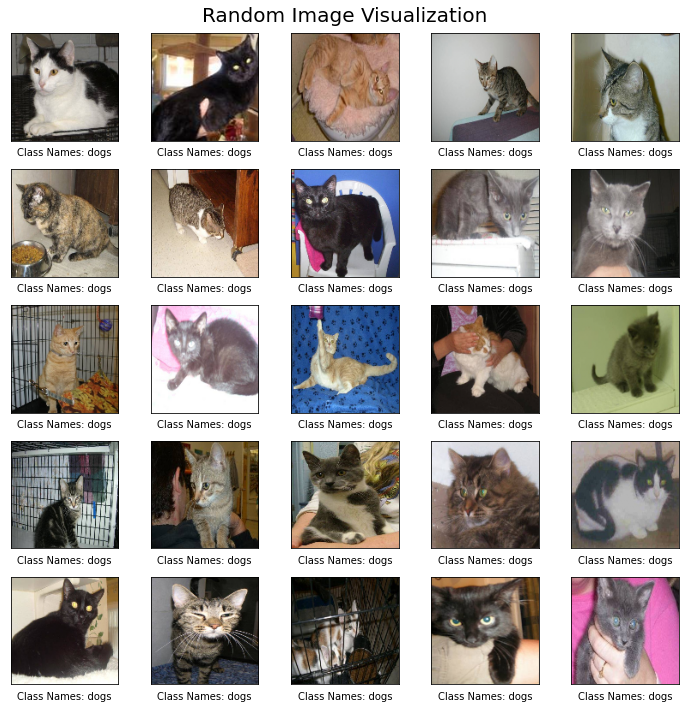

In [32]:
missClassification(classNames, test_images, test_labels, predictedDataLabels)